##### Dataset

In [2]:
# toxic-comments.csv
# Location: https://mitu.co.in/dataset

##### Load the libraries

In [38]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, GRU
from sklearn.model_selection import train_test_split
import re

##### Read the dataset

In [7]:
df = pd.read_csv('toxic-comments.csv')

In [8]:
df.shape

(159571, 8)

In [9]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

##### Define target variables (adapt based on your needs)

In [16]:
toxicities = ["toxic", "severe_toxic", "obscene", "threat", 
              "insult", "identity_hate"]

##### Text Cleaning

In [11]:
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r"[^a-zA-Z0-9]+", " ", text)  # remove non-alphanumeric characters
    return text

In [13]:
df["comment_text"] = df["comment_text"].apply(clean_text)

In [14]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i m se...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i m really not trying to edit war it s...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on imp...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when your v...,0,0,0,0,0,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for prost...,0,0,0,0,0,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0


##### Define input and output variables

In [21]:
# Feature and target preparation
comments = df["comment_text"].tolist()
targets = df[toxicities].values

In [22]:
targets

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [23]:
targets.shape

(159571, 6)

##### Prepare the data

In [25]:
# Tokenization and padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(comments)
sequences = tokenizer.texts_to_sequences(comments)
padded_sequences = pad_sequences(sequences, maxlen=200)

In [26]:
padded_sequences.shape

(159571, 200)

In [27]:
padded_sequences

array([[   0,    0,    0, ..., 4539, 2252,  972],
       [   0,    0,    0, ...,  980,  577,  185],
       [   0,    0,    0, ...,    1,  732,  464],
       ...,
       [   0,    0,    0, ...,   12, 3463, 4381],
       [   0,    0,    0, ...,  153,   36,   10],
       [   0,    0,    0, ..., 1614, 2037,   89]], dtype=int32)

##### Cross-validate

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, targets, test_size=0.2, random_state=0)

In [33]:
X_train.shape

(127656, 200)

In [34]:
X_test.shape

(31915, 200)

##### Build the model

In [39]:
# Model definition (customize architecture as needed)
model = Sequential()
model.add(Embedding(5000, 128, input_length=200))
model.add(GRU(64))
model.add(Dense(6, activation="sigmoid"))  
# Multi-label output with sigmoid activation

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 128)          640000    
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 677638 (2.58 MB)
Trainable params: 677638 (2.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
from keras.utils import plot_model

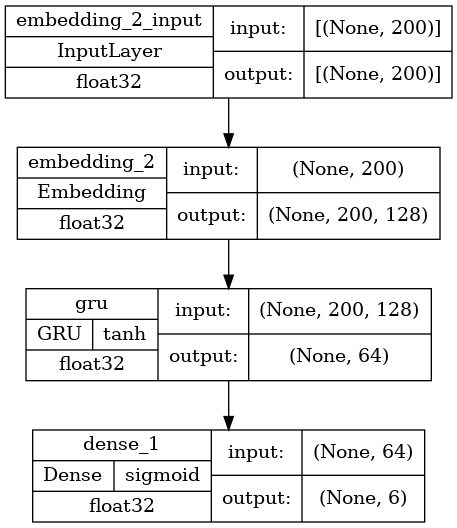

In [43]:
plot_model(model, show_dtype=True, show_layer_activations=True,
          show_layer_names=True, show_shapes=True)

##### Compile the model

In [45]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

##### Train the model

In [48]:
model.fit(X_train, y_train, epochs=3, 
          batch_size=32, validation_data=(X_test, y_test))

Epoch 1/3
3990/3990 [==============================] - 272s 68ms/step - loss: 0.0567 - accuracy: 0.9924 - val_loss: 0.0507 - val_accuracy: 0.9920
Epoch 2/3
3990/3990 [==============================] - 283s 71ms/step - loss: 0.0453 - accuracy: 0.9858 - val_loss: 0.0481 - val_accuracy: 0.9915
Epoch 3/3
3990/3990 [==============================] - 289s 72ms/step - loss: 0.0401 - accuracy: 0.9696 - val_loss: 0.0499 - val_accuracy: 0.9758


##### Predict on new data

In [76]:
new_comment = "Good to see you back on social media."

In [77]:
new_sequence = tokenizer.texts_to_sequences([clean_text(new_comment)])
padded_new_sequence = pad_sequences(new_sequence, maxlen=200)
prediction = model.predict(padded_new_sequence)[0]

1/1 [==============================] - 0s 57ms/step


In [78]:
prediction

array([0.01931059, 0.00055352, 0.01387728, 0.00058247, 0.0073812 ,
       0.00136112], dtype=float32)

In [79]:
for toxicity, prob in zip(toxicities, prediction):
    print(f"{toxicity}: {prob:.2f}")

toxic: 0.02
severe_toxic: 0.00
obscene: 0.01
threat: 0.00
insult: 0.01
identity_hate: 0.00
